# Comprehensive Stock Technical Analysis

1: Quantitative Analysis with PyNance and TA-Lib

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import talib
import pynance as pn
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("=== QUANTITATIVE FINANCIAL ANALYSIS ===")
print("Libraries imported successfully!")

=== QUANTITATIVE FINANCIAL ANALYSIS ===
Libraries imported successfully!


In [3]:
# Use the symbols you actually have locally
stock_symbols = ['AAPL', 'AMZN', 'GOOG', 'META', 'MSFT', 'NVDA']
data_folder = "../data/yfinancedata"  

def load_stock_data_from_csv(symbols, folder=data_folder):
    """
    Load stock data for multiple symbols from local CSV files.
    Returns a dict: { 'AAPL': DataFrame, 'AMZN': DataFrame, ... }
    """
    stock_data = {}

    for symbol in symbols:
        file_path = os.path.join(folder, f"{symbol}.csv")
        try:
            print(f"Loading data for {symbol} from {file_path}...")
            df = pd.read_csv(file_path)

            # Expecting columns: Date, Close, High, Low, Open, Volume
            if 'Date' not in df.columns:
                print(f"✗ {symbol}: 'Date' column not found, skipping")
                continue

            # Parse Date and set as index
            df['Date'] = pd.to_datetime(df['Date'], utc=True, errors='coerce')
            df = df.set_index('Date').sort_index()

            if not df.empty:
                stock_data[symbol] = df
                print(f"✓ {symbol}: {len(df)} trading days loaded")
            else:
                print(f"✗ {symbol}: DataFrame is empty after processing")

        except FileNotFoundError:
            print(f"✗ {symbol}: File not found at {file_path}")
        except Exception as e:
            print(f"✗ {symbol}: Error while loading - {e}")

    return stock_data


In [4]:
print("\n" + "="*50)
print("LOADING STOCK DATA FROM CSV")
print("="*50)
stock_data = load_stock_data_from_csv(stock_symbols, folder=data_folder)


LOADING STOCK DATA FROM CSV
Loading data for AAPL from ../data/yfinancedata\AAPL.csv...
✓ AAPL: 3774 trading days loaded
Loading data for AMZN from ../data/yfinancedata\AMZN.csv...
✓ AMZN: 3774 trading days loaded
Loading data for GOOG from ../data/yfinancedata\GOOG.csv...
✓ GOOG: 3774 trading days loaded
Loading data for META from ../data/yfinancedata\META.csv...
✓ META: 2923 trading days loaded
Loading data for MSFT from ../data/yfinancedata\MSFT.csv...
✓ MSFT: 3774 trading days loaded
Loading data for NVDA from ../data/yfinancedata\NVDA.csv...
✓ NVDA: 3774 trading days loaded


In [5]:
# Display data structure for first stock
if stock_data:
    first_symbol = list(stock_data.keys())[0]
    print(f"\nData structure for {first_symbol}:")
    print(stock_data[first_symbol].head())
    print(f"\nColumns: {stock_data[first_symbol].columns.tolist()}")
    print(f"Date range: {stock_data[first_symbol].index.min()} to {stock_data[first_symbol].index.max()}")


Data structure for AAPL:
                              Close      High       Low      Open      Volume
Date                                                                         
2009-01-02 00:00:00+00:00  2.721686  2.730385  2.554037  2.575630   746015200
2009-01-05 00:00:00+00:00  2.836553  2.884539  2.780469  2.794266  1181608400
2009-01-06 00:00:00+00:00  2.789767  2.914229  2.770872  2.877641  1289310400
2009-01-07 00:00:00+00:00  2.729484  2.774170  2.706990  2.753477   753048800
2009-01-08 00:00:00+00:00  2.780169  2.793666  2.700393  2.712090   673500800

Columns: ['Close', 'High', 'Low', 'Open', 'Volume']
Date range: 2009-01-02 00:00:00+00:00 to 2023-12-29 00:00:00+00:00


2: Calculate Technical Indicators with TA-Lib

In [6]:
def calculate_technical_indicators(df):
    """
    Calculate comprehensive technical indicators for a stock DataFrame
    """
    indicators_df = df.copy()
    
    # Price-based indicators
    indicators_df['SMA_20'] = talib.SMA(indicators_df['Close'], timeperiod=20)
    indicators_df['SMA_50'] = talib.SMA(indicators_df['Close'], timeperiod=50)
    indicators_df['SMA_200'] = talib.SMA(indicators_df['Close'], timeperiod=200)
    
    indicators_df['EMA_12'] = talib.EMA(indicators_df['Close'], timeperiod=12)
    indicators_df['EMA_26'] = talib.EMA(indicators_df['Close'], timeperiod=26)
    
    # Momentum Indicators
    indicators_df['RSI_14'] = talib.RSI(indicators_df['Close'], timeperiod=14)
    indicators_df['RSI_21'] = talib.RSI(indicators_df['Close'], timeperiod=21)
    
    # MACD
    indicators_df['MACD'], indicators_df['MACD_Signal'], indicators_df['MACD_Hist'] = talib.MACD(
        indicators_df['Close'], fastperiod=12, slowperiod=26, signalperiod=9
    )
    
    # Bollinger Bands
    indicators_df['BB_Upper'], indicators_df['BB_Middle'], indicators_df['BB_Lower'] = talib.BBANDS(
        indicators_df['Close'], timeperiod=20, nbdevup=2, nbdevdn=2, matype=0
    )
    
    # Volatility Indicators
    indicators_df['ATR_14'] = talib.ATR(
        indicators_df['High'], indicators_df['Low'], indicators_df['Close'], timeperiod=14
    )
    
    # Volume Indicators
    indicators_df['Volume_SMA_20'] = talib.SMA(indicators_df['Volume'], timeperiod=20)
    
    # Stochastic
    indicators_df['SlowK'], indicators_df['SlowD'] = talib.STOCH(
        indicators_df['High'], indicators_df['Low'], indicators_df['Close'],
        fastk_period=14, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0
    )
    
    # Additional indicators
    indicators_df['ADX_14'] = talib.ADX(
        indicators_df['High'], indicators_df['Low'], indicators_df['Close'], timeperiod=14
    )
    
    indicators_df['OBV'] = talib.OBV(indicators_df['Close'], indicators_df['Volume'])
    
    return indicators_df

print("\n" + "="*50)
print("CALCULATING TECHNICAL INDICATORS")
print("="*50)

# Calculate indicators for all stocks
stock_indicators = {}
for symbol, data in stock_data.items():
    print(f"Calculating indicators for {symbol}...")
    stock_indicators[symbol] = calculate_technical_indicators(data)

# Display indicators for first stock
if stock_indicators:
    first_symbol = list(stock_indicators.keys())[0]
    indicator_cols = [col for col in stock_indicators[first_symbol].columns if col not in ['Open', 'High', 'Low', 'Close', 'Volume']]
    
    print(f"\nTechnical indicators calculated for {first_symbol}:")
    print(f"Total indicators: {len(indicator_cols)}")
    print("Indicator columns:")
    for i, col in enumerate(indicator_cols, 1):
        print(f"{i:2d}. {col}")


CALCULATING TECHNICAL INDICATORS
Calculating indicators for AAPL...
Calculating indicators for AMZN...
Calculating indicators for GOOG...
Calculating indicators for META...
Calculating indicators for MSFT...
Calculating indicators for NVDA...

Technical indicators calculated for AAPL:
Total indicators: 19
Indicator columns:
 1. SMA_20
 2. SMA_50
 3. SMA_200
 4. EMA_12
 5. EMA_26
 6. RSI_14
 7. RSI_21
 8. MACD
 9. MACD_Signal
10. MACD_Hist
11. BB_Upper
12. BB_Middle
13. BB_Lower
14. ATR_14
15. Volume_SMA_20
16. SlowK
17. SlowD
18. ADX_14
19. OBV


3 PyNance Financial Metrics Analysis

In [11]:
def calculate_metrics_from_df(df, symbol, risk_free_rate=0.0):
    """
    Calculate financial metrics using only the provided DataFrame (no PyNance, no downloads).

    Expected df:
        - Index: Date (datetime)
        - Columns: at least 'Close' and 'Volume'
    """
    metrics = {}

    # Ensure df is sorted by date
    df = df.sort_index()

    # ----- Daily returns -----
    # Percentage change of Close price as daily returns
    if 'Close' not in df.columns:
        print(f"{symbol}: 'Close' column missing, cannot compute metrics.")
        return {}

    daily_returns = df['Close'].pct_change().dropna()

    # If not enough data, return NaNs
    if daily_returns.empty:
        print(f"Not enough data to compute metrics for {symbol}.")
        metrics['volatility_30d']   = np.nan
        metrics['volatility_60d']   = np.nan
        metrics['sharpe_ratio']     = np.nan
        metrics['max_drawdown']     = np.nan
        metrics['total_return']     = np.nan
        metrics['avg_daily_return'] = np.nan
        metrics['avg_volume']       = df['Volume'].mean() if 'Volume' in df.columns else np.nan
        metrics['volume_trend']     = np.nan
        return metrics

    # ----- Volatility metrics -----
    # Rolling std dev of daily returns; use last available window value
    metrics['volatility_30d'] = (
        daily_returns.rolling(window=30).std().iloc[-1]
        if len(daily_returns) >= 30 else np.nan
    )
    metrics['volatility_60d'] = (
        daily_returns.rolling(window=60).std().iloc[-1]
        if len(daily_returns) >= 60 else np.nan
    )

    # ----- Return metrics -----
    # Total return over the entire period
    metrics['total_return'] = df['Close'].iloc[-1] / df['Close'].iloc[0] - 1

    # Average daily return
    metrics['avg_daily_return'] = daily_returns.mean()

    # ----- Sharpe ratio (annualized) -----
    excess_returns = daily_returns - risk_free_rate
    if excess_returns.std() != 0:
        sharpe_daily = excess_returns.mean() / excess_returns.std()
        metrics['sharpe_ratio'] = sharpe_daily * np.sqrt(252)  # annualized
    else:
        metrics['sharpe_ratio'] = np.nan

    # ----- Max drawdown -----
    running_max = df['Close'].cummax()
    drawdown = (df['Close'] - running_max) / running_max
    metrics['max_drawdown'] = drawdown.min()  # most negative drawdown

    # ----- Volume metrics -----
    if 'Volume' in df.columns:
        metrics['avg_volume'] = df['Volume'].mean()
        vol_change_30d = df['Volume'].pct_change(30)
        metrics['volume_trend'] = vol_change_30d.mean()
    else:
        metrics['avg_volume'] = np.nan
        metrics['volume_trend'] = np.nan

    return metrics


In [12]:
print("\n" + "="*50)
print("FINANCIAL METRICS (From Local DataFrames)")
print("="*50)

metrics_all = {}
for symbol, df_symbol in stock_indicators.items():
    print(f"Calculating metrics for {symbol}...")
    metrics_all[symbol] = calculate_metrics_from_df(df_symbol, symbol)

print("\nFinancial Metrics Summary:")
metrics_df = pd.DataFrame(metrics_all).T
print(metrics_df.round(4))



FINANCIAL METRICS (From Local DataFrames)
Calculating metrics for AAPL...
Calculating metrics for AMZN...
Calculating metrics for GOOG...
Calculating metrics for META...
Calculating metrics for MSFT...
Calculating metrics for NVDA...

Financial Metrics Summary:
      volatility_30d  volatility_60d  total_return  avg_daily_return  \
AAPL          0.0080          0.0098       69.0774            0.0013   
AMZN          0.0113          0.0179       54.9014            0.0013   
GOOG          0.0150          0.0185       16.6096            0.0009   
META          0.0140          0.0170        8.2587            0.0011   
MSFT          0.0104          0.0123       23.9586            0.0010   
NVDA          0.0172          0.0209      246.9175            0.0019   

      sharpe_ratio  max_drawdown    avg_volume  volume_trend  
AAPL        1.1362       -0.4380  2.640640e+08        0.0968  
AMZN        0.9472       -0.5615  9.185184e+07        0.1423  
GOOG        0.8336       -0.4460  6.123096e

4: Comprehensive Data Visualization

In [13]:
def create_technical_plots(df, symbol, indicators_df):
    """
    Create comprehensive technical analysis plots
    """
    fig = plt.figure(figsize=(20, 16))
    
    # 1. Price and Moving Averages
    ax1 = plt.subplot(4, 2, 1)
    plt.plot(df.index, df['Close'], label='Close Price', linewidth=2, color='black')
    plt.plot(df.index, indicators_df['SMA_20'], label='SMA 20', alpha=0.7)
    plt.plot(df.index, indicators_df['SMA_50'], label='SMA 50', alpha=0.7)
    plt.plot(df.index, indicators_df['SMA_200'], label='SMA 200', alpha=0.7)
    plt.title(f'{symbol} - Price and Moving Averages')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    
    # 2. RSI
    ax2 = plt.subplot(4, 2, 2)
    plt.plot(df.index, indicators_df['RSI_14'], label='RSI 14', color='purple', linewidth=2)
    plt.axhline(70, linestyle='--', color='r', alpha=0.7, label='Overbought (70)')
    plt.axhline(30, linestyle='--', color='g', alpha=0.7, label='Oversold (30)')
    plt.axhline(50, linestyle='--', color='gray', alpha=0.5, label='Neutral (50)')
    plt.title(f'{symbol} - RSI Indicator')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    plt.ylim(0, 100)
    
    # 3. MACD
    ax3 = plt.subplot(4, 2, 3)
    plt.plot(df.index, indicators_df['MACD'], label='MACD', color='blue', linewidth=2)
    plt.plot(df.index, indicators_df['MACD_Signal'], label='Signal Line', color='red', linewidth=1)
    plt.bar(df.index, indicators_df['MACD_Hist'], label='MACD Histogram', alpha=0.3, color='gray')
    plt.title(f'{symbol} - MACD')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    
    # 4. Bollinger Bands
    ax4 = plt.subplot(4, 2, 4)
    plt.plot(df.index, df['Close'], label='Close Price', color='black', linewidth=1)
    plt.plot(df.index, indicators_df['BB_Upper'], label='Upper Band', color='red', alpha=0.7)
    plt.plot(df.index, indicators_df['BB_Middle'], label='Middle Band', color='blue', alpha=0.7)
    plt.plot(df.index, indicators_df['BB_Lower'], label='Lower Band', color='green', alpha=0.7)
    plt.fill_between(df.index, indicators_df['BB_Upper'], indicators_df['BB_Lower'], alpha=0.1)
    plt.title(f'{symbol} - Bollinger Bands')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    
    # 5. Volume with Moving Average
    ax5 = plt.subplot(4, 2, 5)
    plt.bar(df.index, df['Volume'], alpha=0.7, label='Volume', color='lightblue')
    plt.plot(df.index, indicators_df['Volume_SMA_20'], label='Volume SMA 20', color='red', linewidth=2)
    plt.title(f'{symbol} - Volume Analysis')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    
    # 6. ATR - Average True Range
    ax6 = plt.subplot(4, 2, 6)
    plt.plot(df.index, indicators_df['ATR_14'], label='ATR 14', color='orange', linewidth=2)
    plt.title(f'{symbol} - Average True Range (Volatility)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    
    # 7. Stochastic Oscillator
    ax7 = plt.subplot(4, 2, 7)
    plt.plot(df.index, indicators_df['SlowK'], label='Slow %K', color='blue', linewidth=2)
    plt.plot(df.index, indicators_df['SlowD'], label='Slow %D', color='red', linewidth=2)
    plt.axhline(80, linestyle='--', color='r', alpha=0.7, label='Overbought')
    plt.axhline(20, linestyle='--', color='g', alpha=0.7, label='Oversold')
    plt.title(f'{symbol} - Stochastic Oscillator')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    plt.ylim(0, 100)
    
    # 8. ADX - Average Directional Index
    ax8 = plt.subplot(4, 2, 8)
    plt.plot(df.index, indicators_df['ADX_14'], label='ADX 14', color='purple', linewidth=2)
    plt.axhline(25, linestyle='--', color='gray', alpha=0.7, label='Trend Strength Threshold')
    plt.title(f'{symbol} - ADX (Trend Strength)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    return fig




CREATING TECHNICAL ANALYSIS VISUALIZATIONS
Creating technical charts for AAPL...


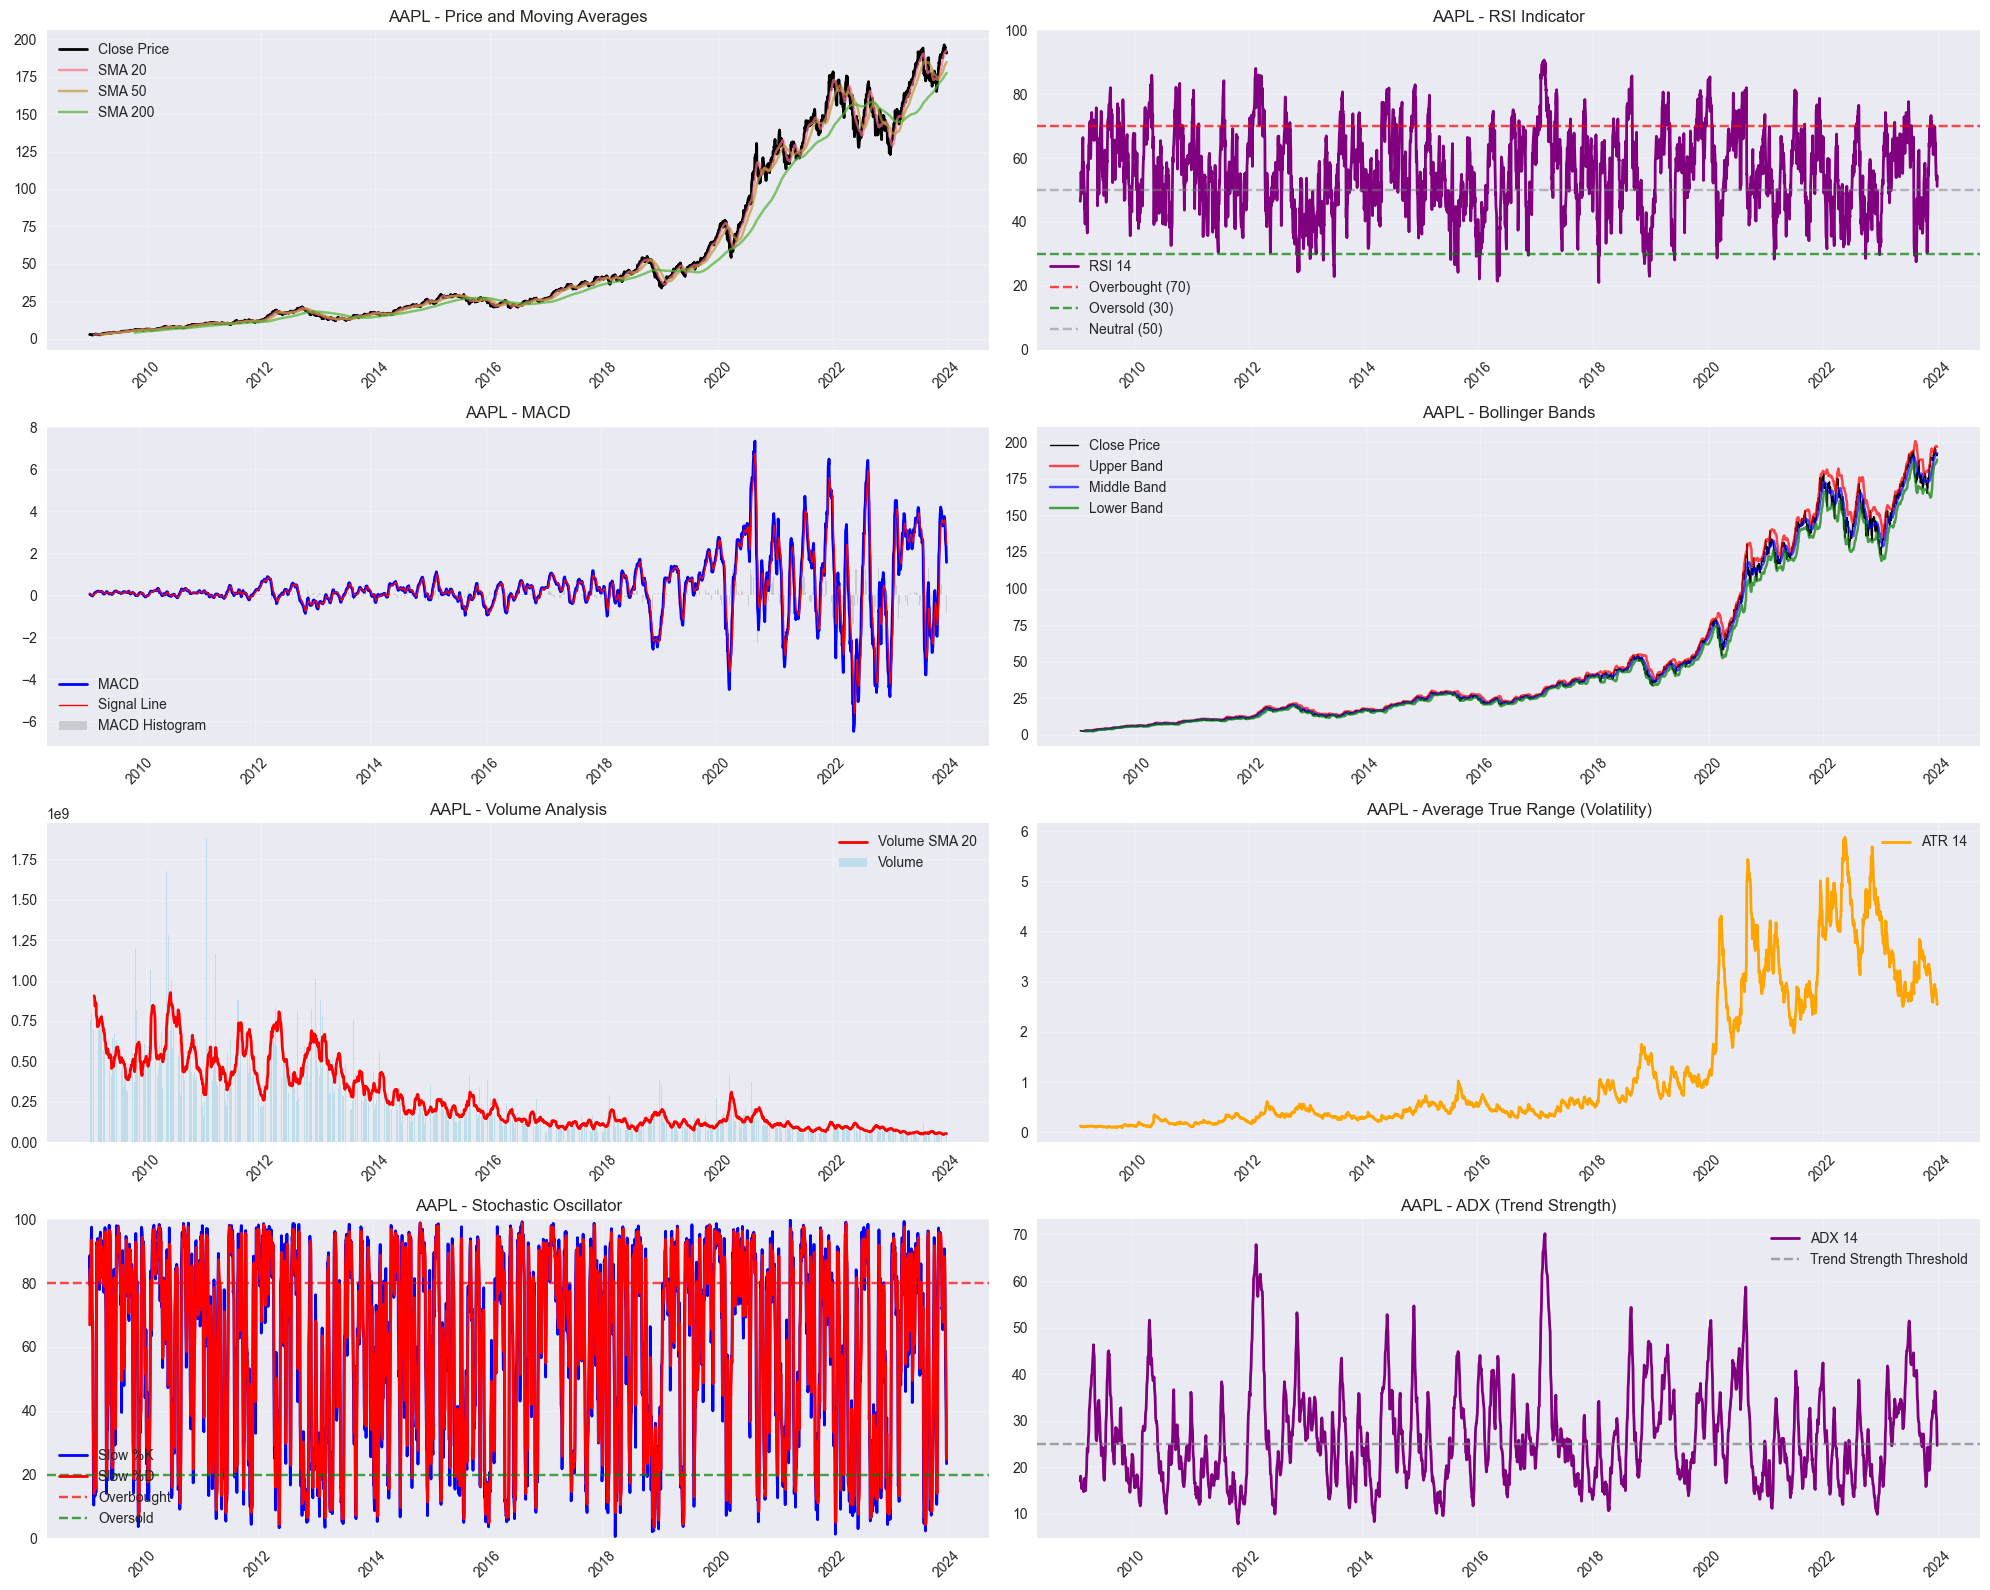

Creating technical charts for AMZN...


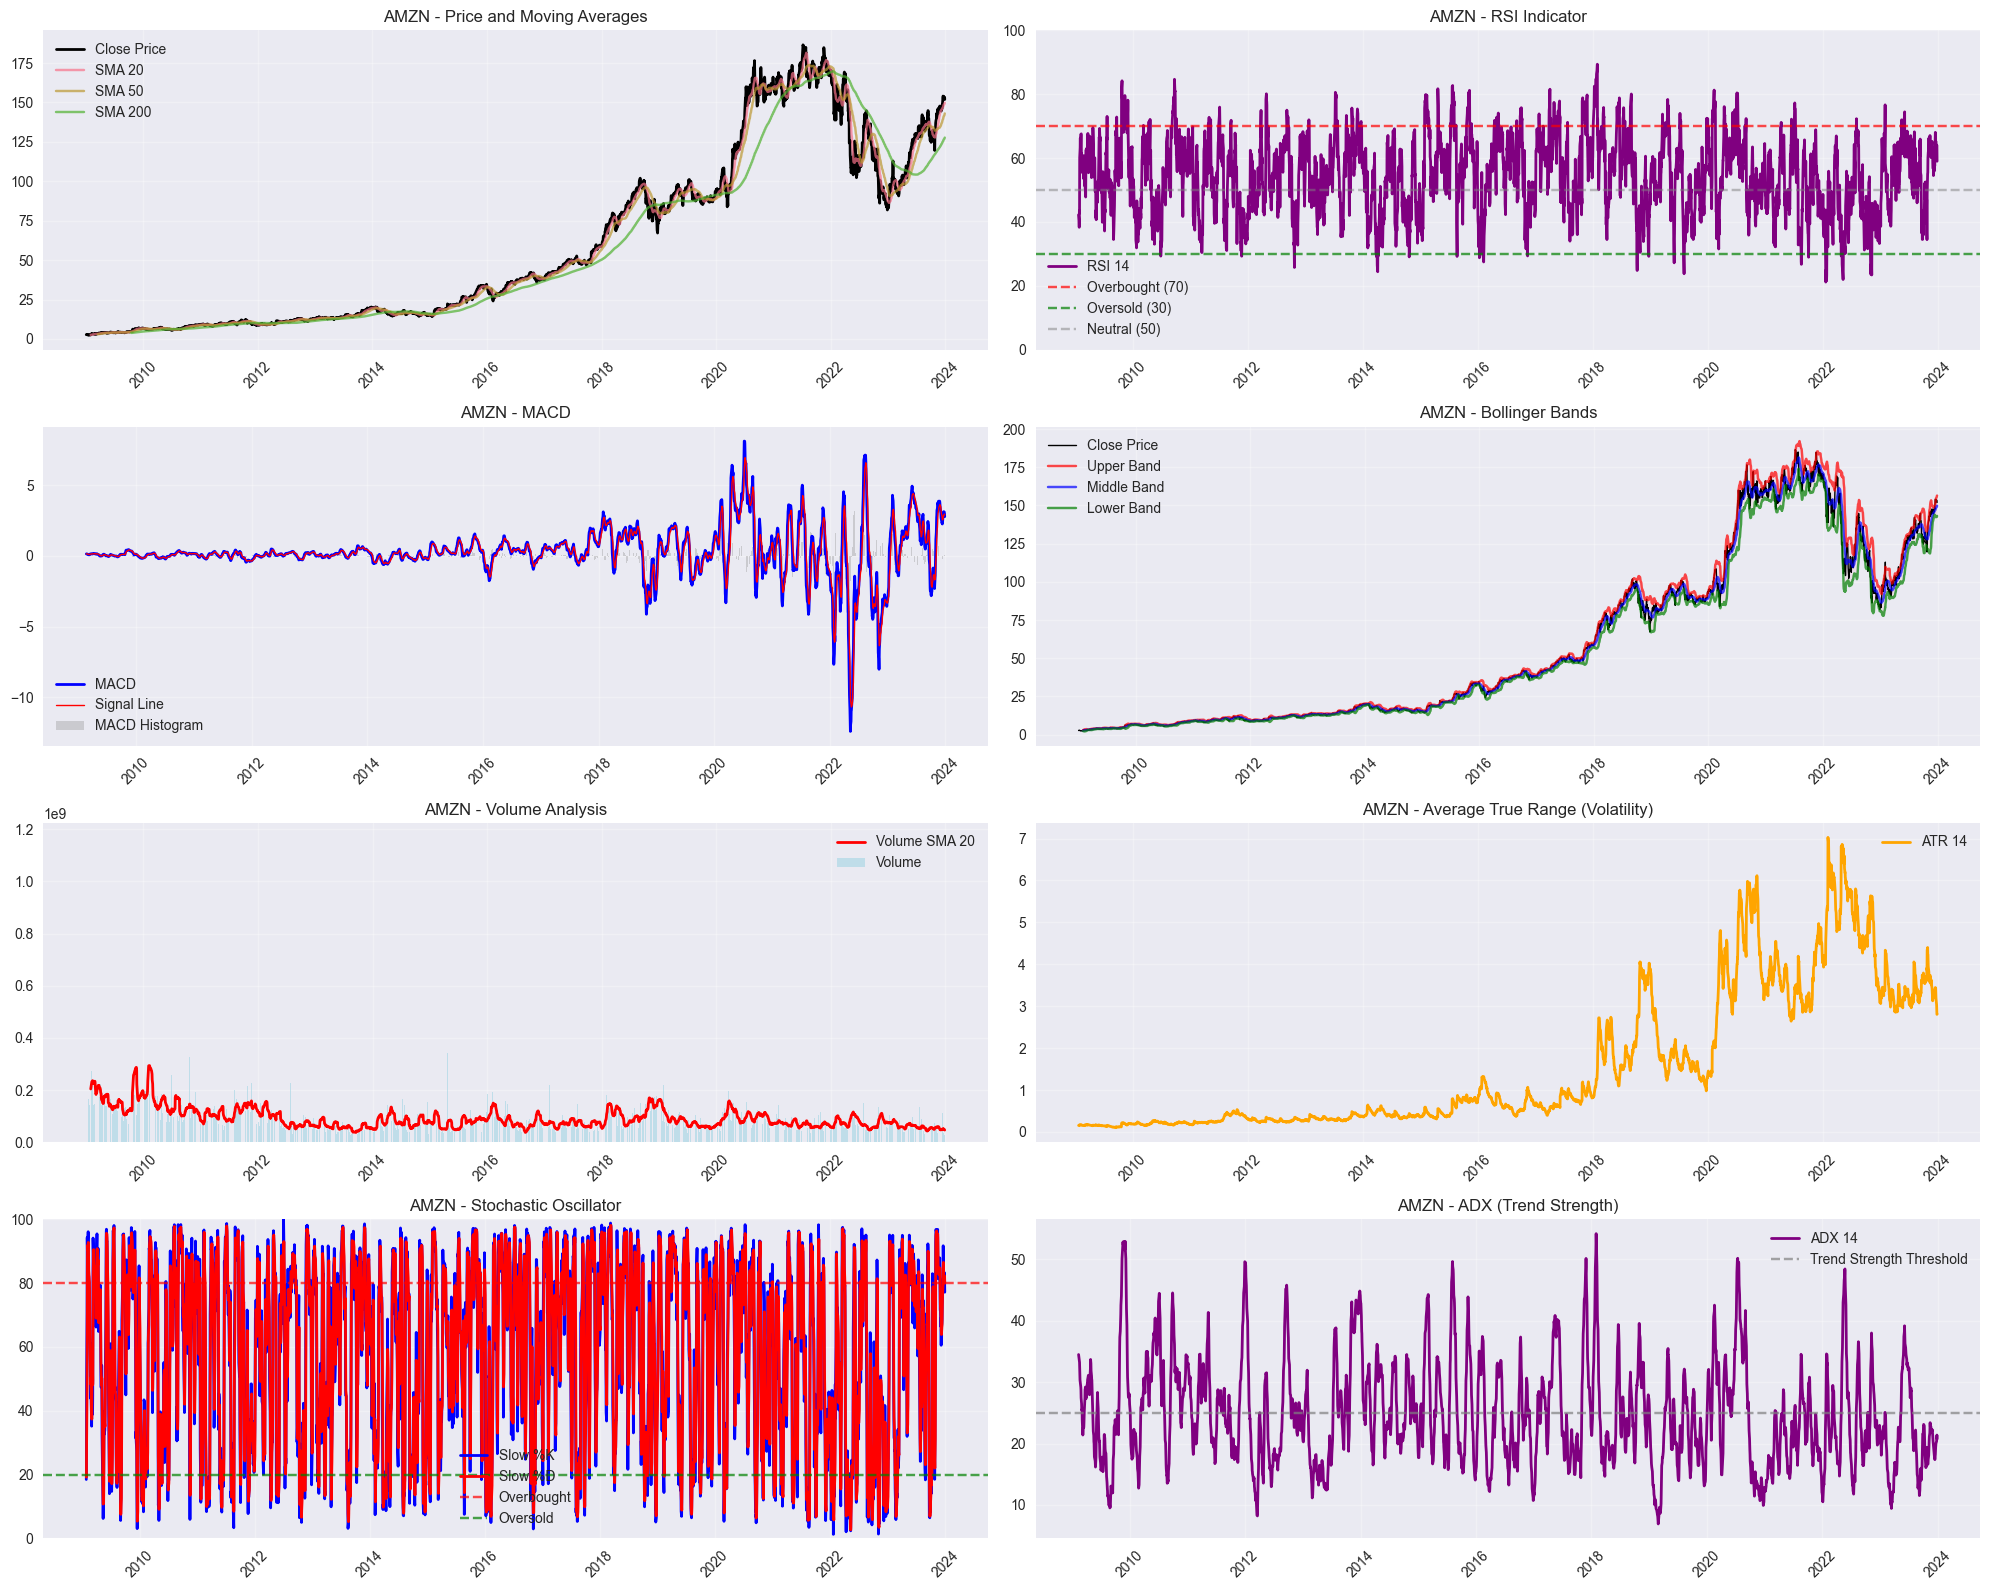

Creating technical charts for GOOG...


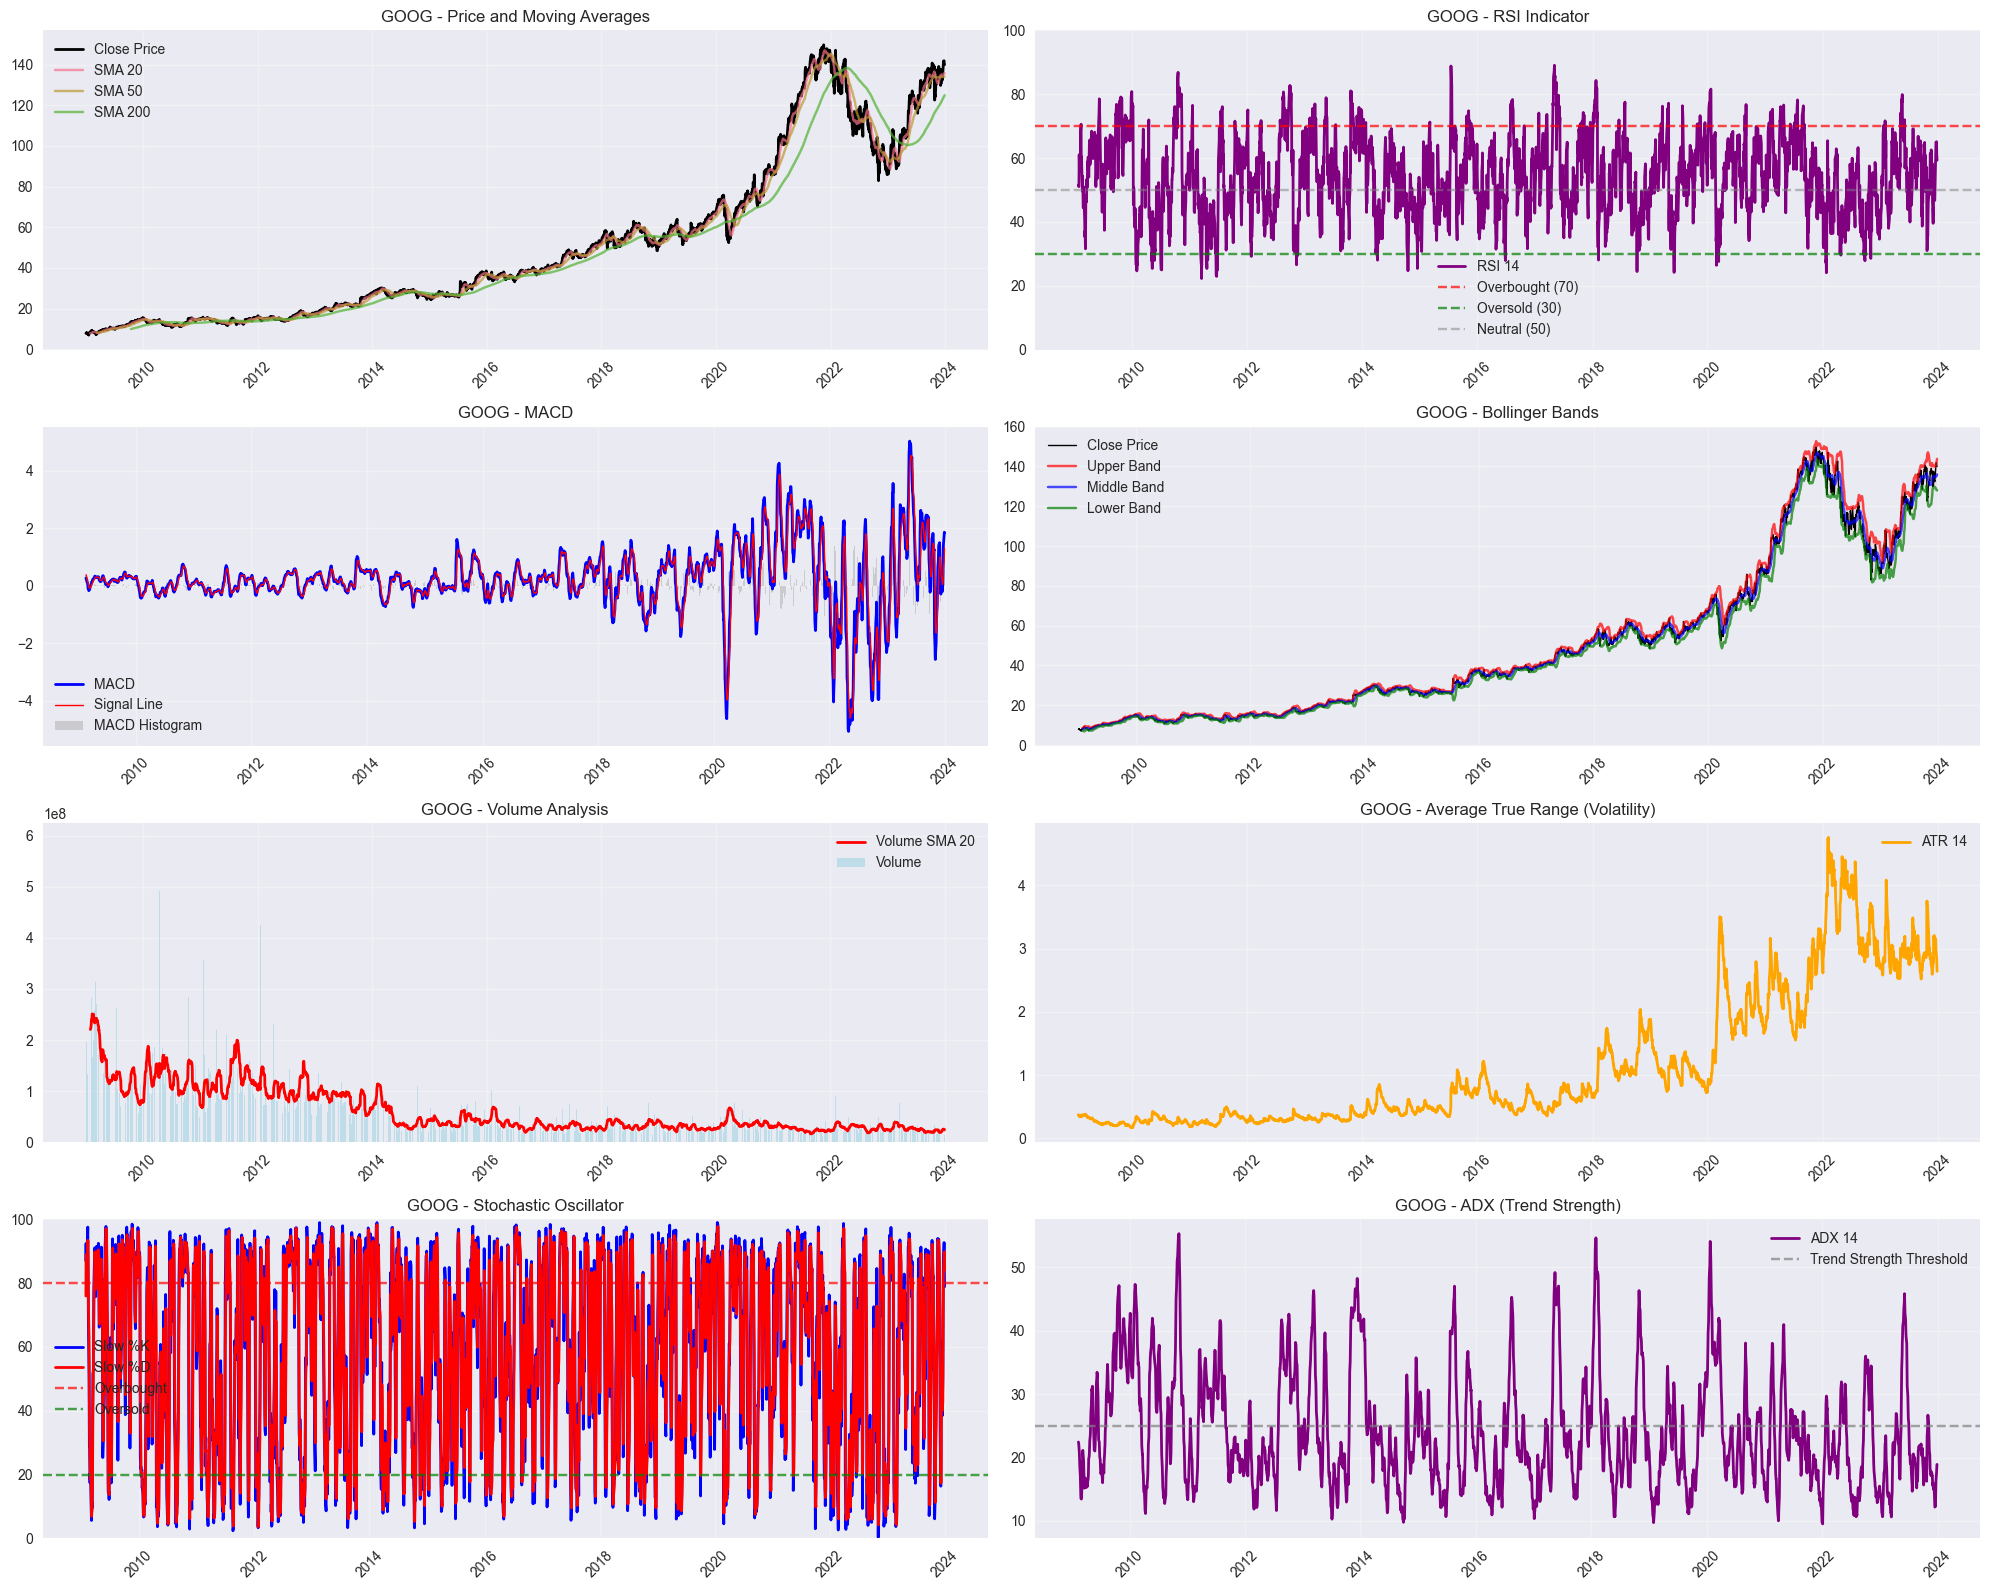

Creating technical charts for META...


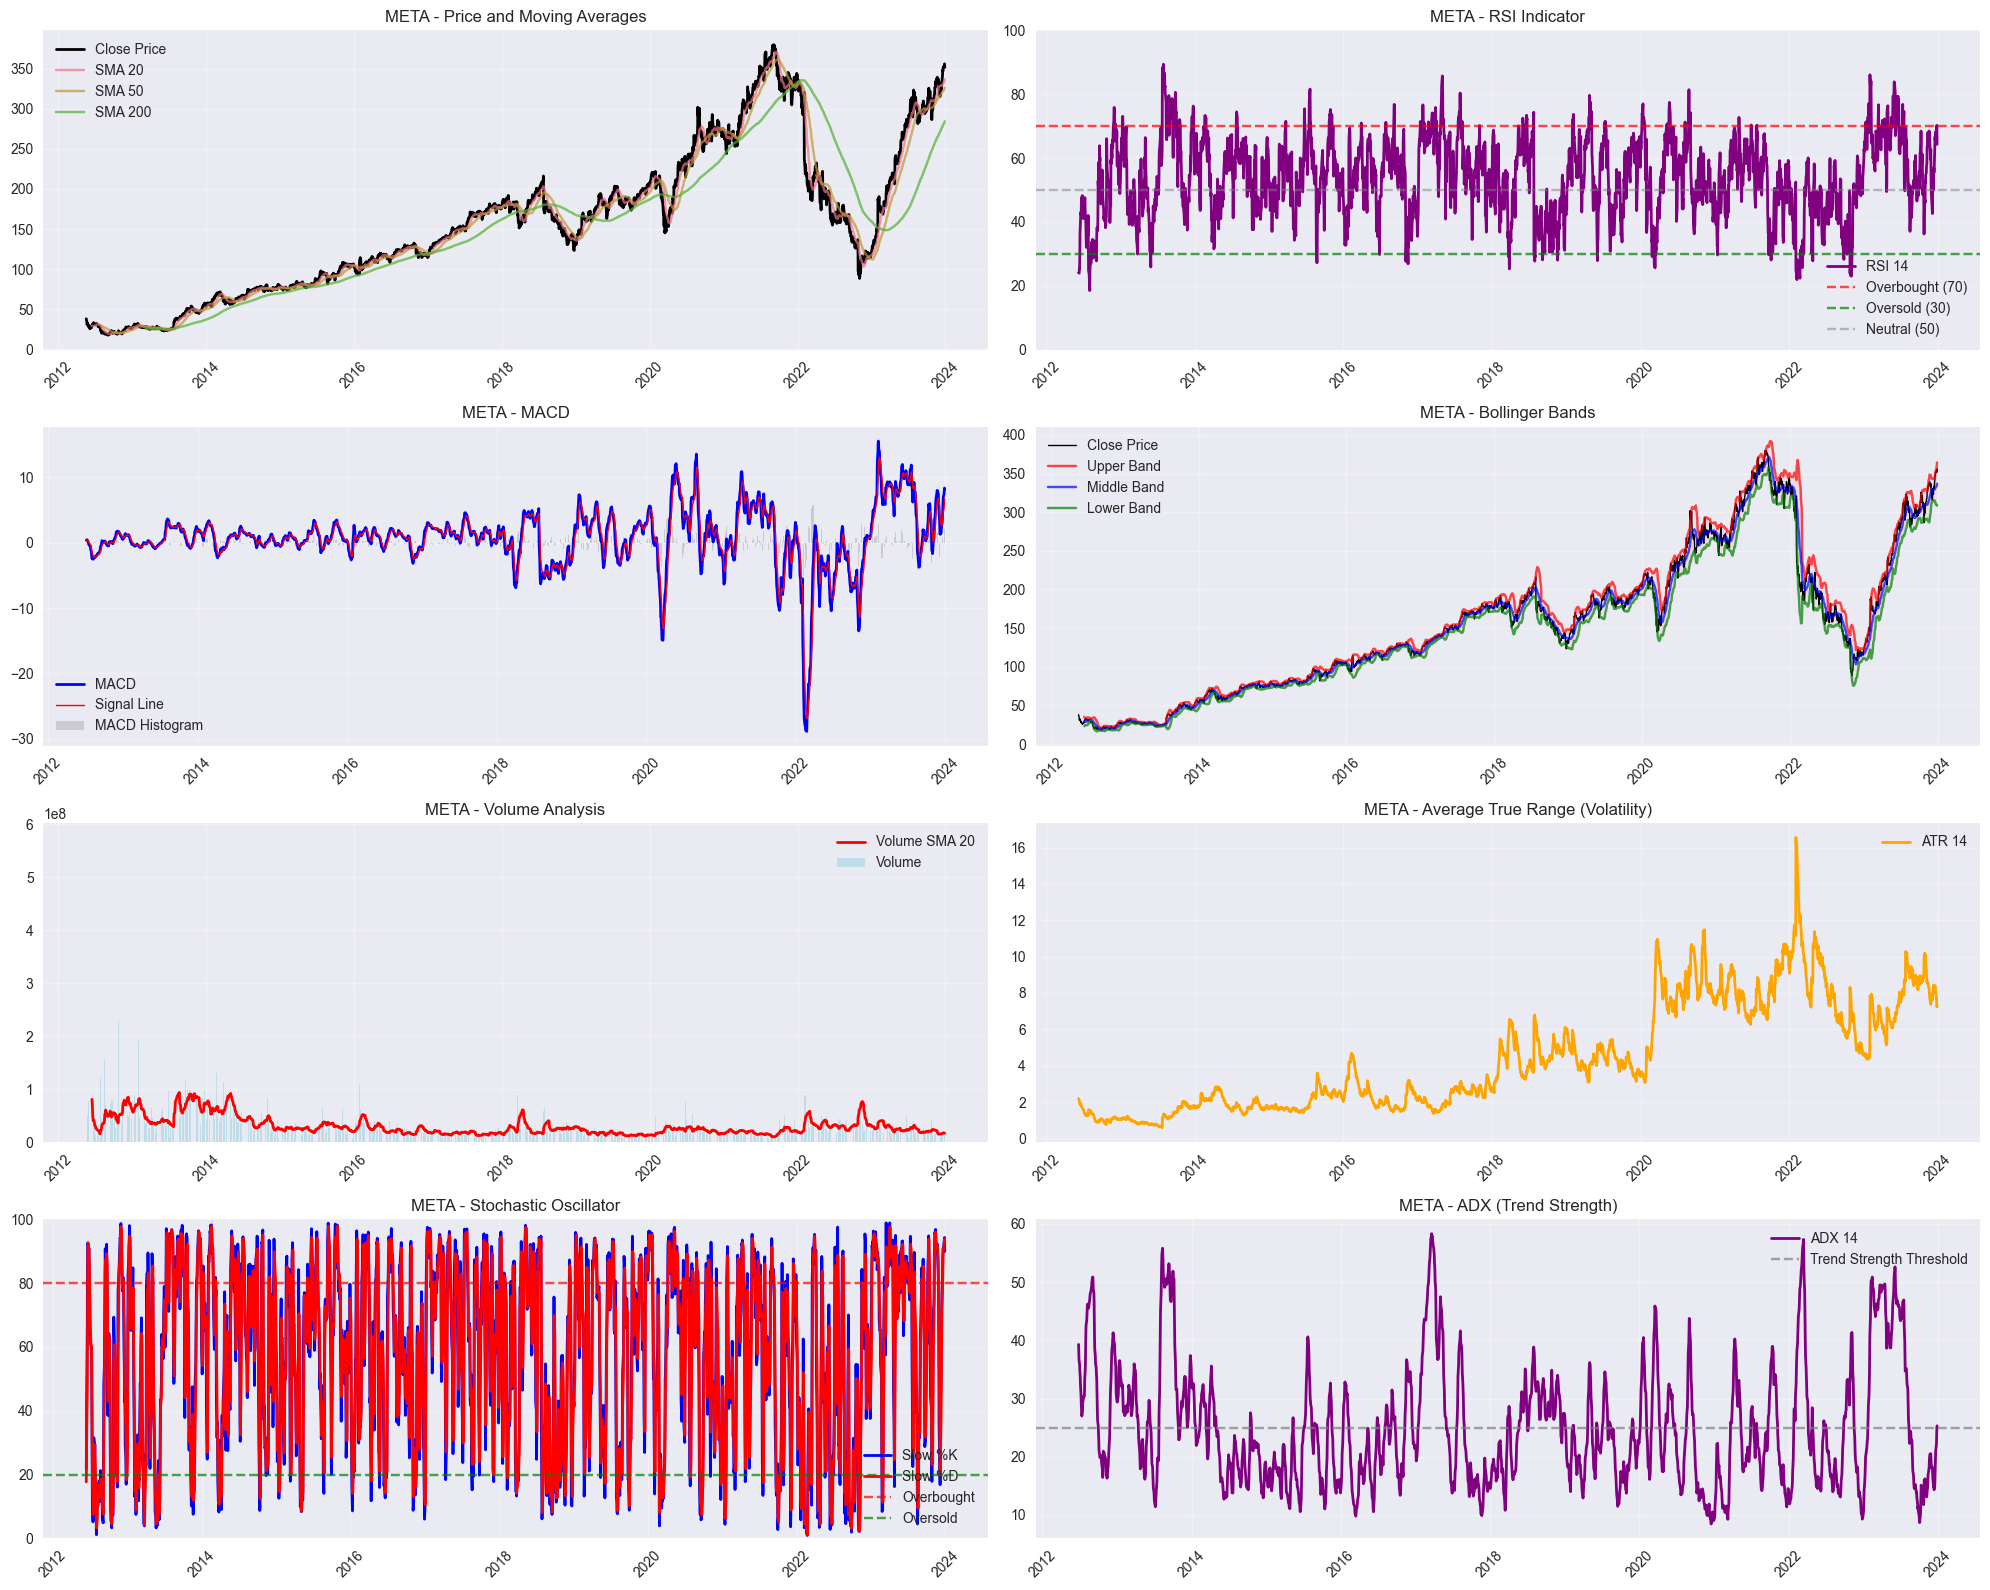

Creating technical charts for MSFT...


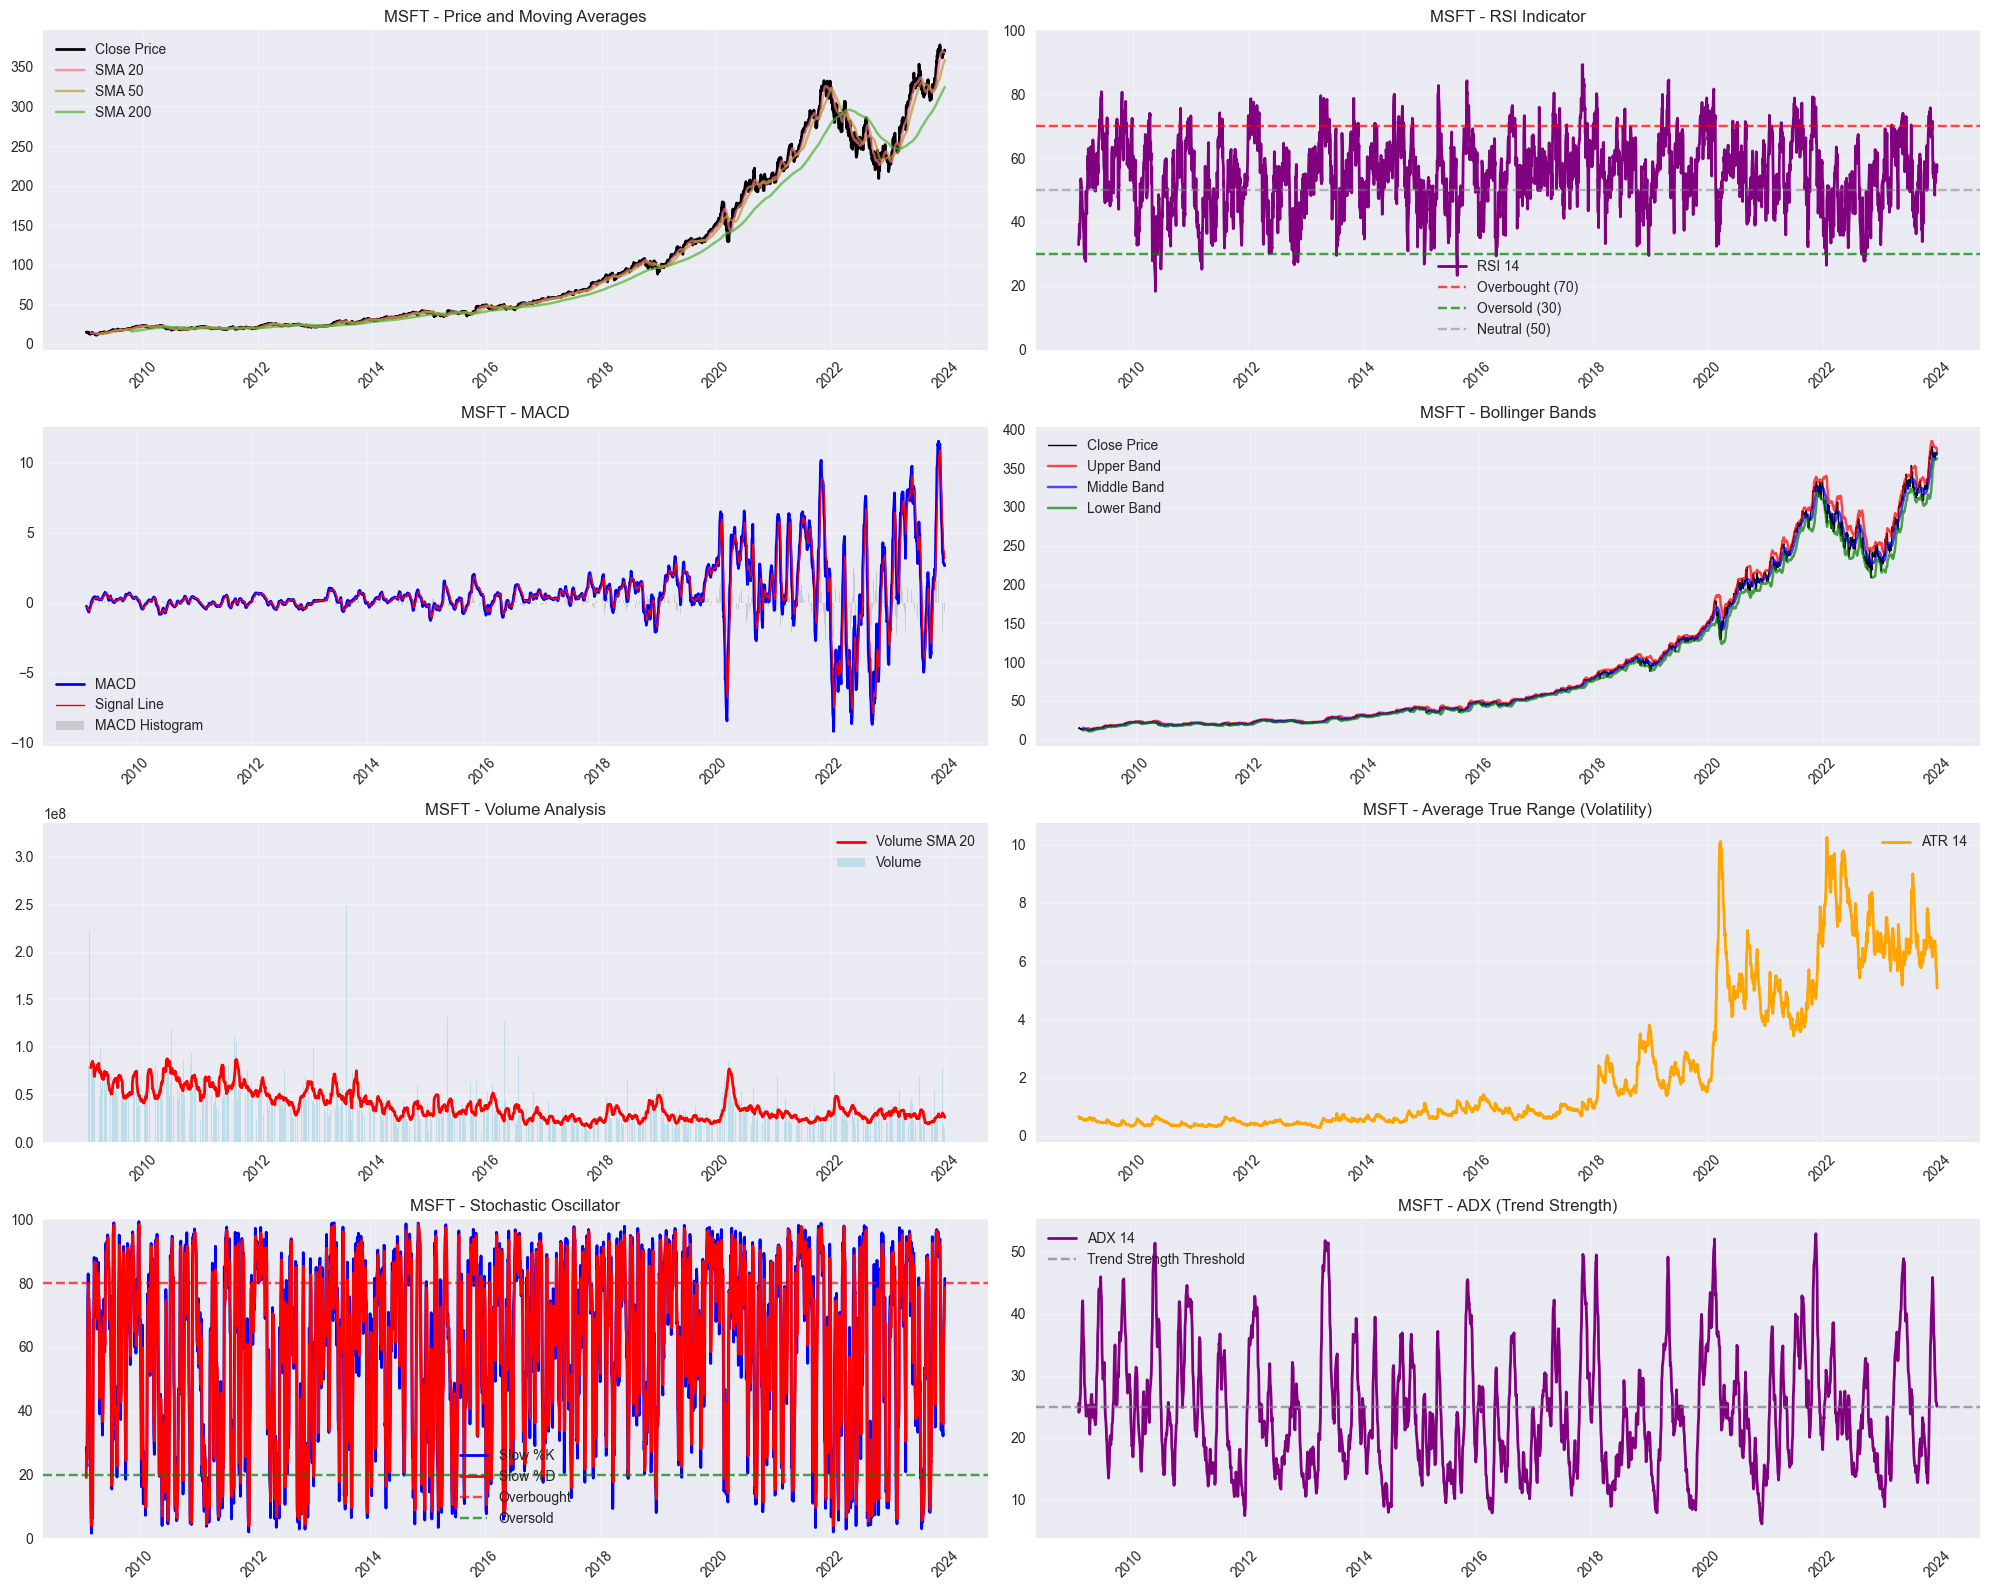

Creating technical charts for NVDA...


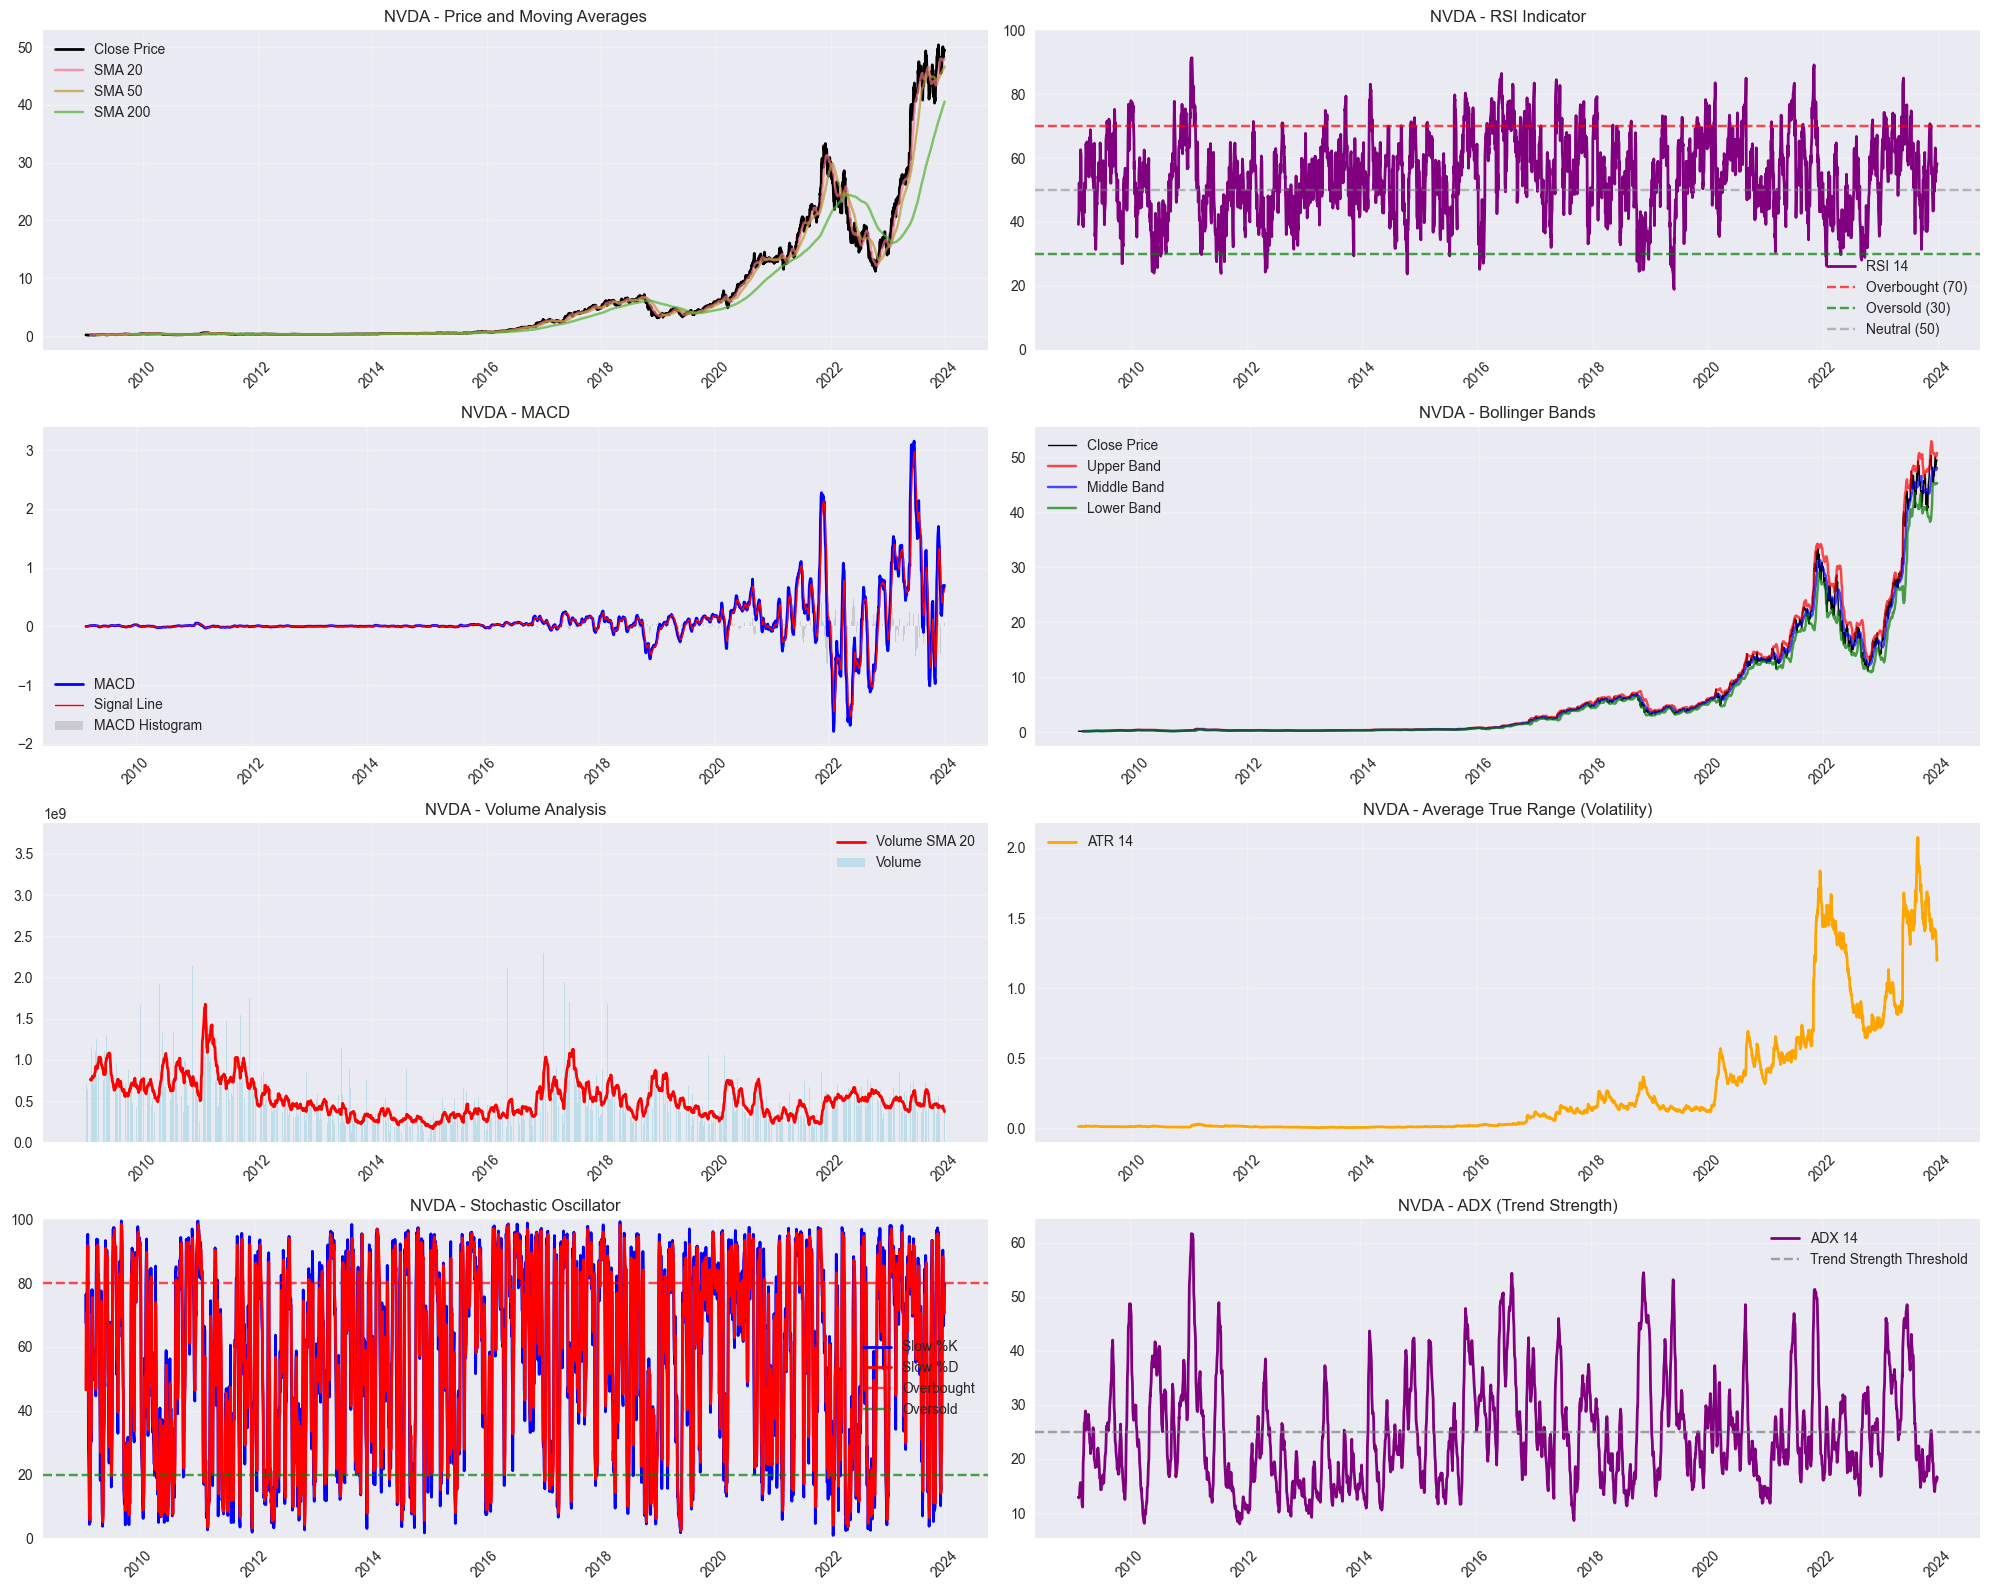

In [16]:
print("\n" + "="*50)
print("CREATING TECHNICAL ANALYSIS VISUALIZATIONS")
print("="*50)

# Create visualizations for first 3 stocks
for i, symbol in enumerate(list(stock_indicators.keys())[:6]):
    print(f"Creating technical charts for {symbol}...")
    create_technical_plots(stock_data[symbol], symbol, stock_indicators[symbol])